<a href="https://colab.research.google.com/github/dharanitharan24/ChatApp-Project/blob/main/sentiment_analysis_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
data = pd.read_csv('/content/imdb_dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
import re
def clean(text):
    text = text.lower()
    text = re.sub(r'<.*?>','',text)
    text = re.sub(r'[^a-z\s]','',text)
    words = word_tokenize(text)
    words = [w for w in words if w not in stopwords.words('english')]
    return ' '.join(words)

data['clean_review'] = data['review'].apply(clean)
data.head()


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [9]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['clean_review']).toarray()
y = data['sentiment'].map({'positive': 1, 'negative': 0})  # convert to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.8868

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



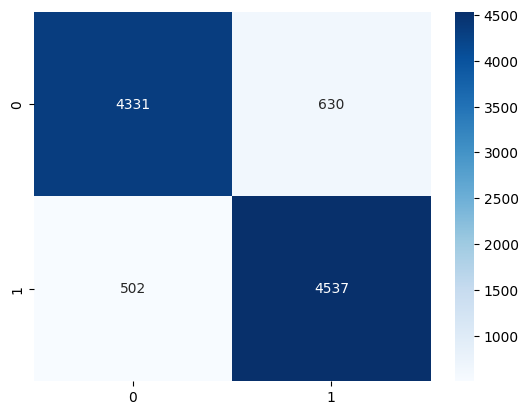

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

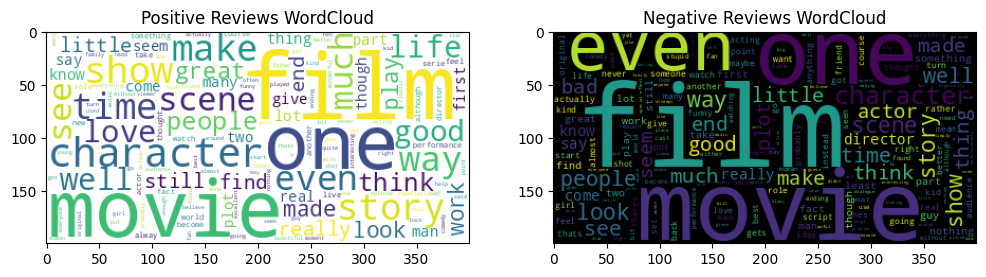

In [12]:
from wordcloud import WordCloud

positive_text = " ".join(data[data['sentiment']=='positive']['clean_review'])
negative_text = " ".join(data[data['sentiment']=='negative']['clean_review'])

wc_pos = WordCloud(max_words=200, background_color='white').generate(positive_text)
wc_neg = WordCloud(max_words=200, background_color='black').generate(negative_text)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wc_pos)
plt.title("Positive Reviews WordCloud")
plt.subplot(1,2,2)
plt.imshow(wc_neg)
plt.title("Negative Reviews WordCloud")
plt.show()